In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from BaselineRemoval import BaselineRemoval
from sklearn.cluster import KMeans
from scipy.signal import find_peaks


def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def area(a,sigma):
    return a*np.sqrt(2*np.pi*np.power(sigma,2))


# Q2

[242.40833106  48.05801767  -0.77588392] 471.44846608982556
[ 8.14773373e+02  2.54411196e+01 -6.61374222e-01] 1350.7470435982138
[227.61989369  37.9893488    1.08361106] 618.263458961432


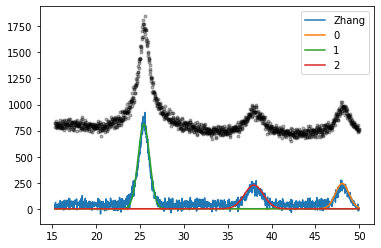

In [86]:
#Origenal data 
df = pd.read_csv('MSE101-Tutorial-Q2.txt', header=None)
plt.plot(df[0], df[1],'k.',alpha=0.3)

#point averaging 
'''av = 6
df['av'] = 2*df[1].rolling(av, win_type='triang').sum()/av
plt.plot(df[0],df['av'], label='Rolling average')
df = df.dropna()'''

#Baseline subraction 
baseObj=BaselineRemoval(df[1])
Zhangfit_output=baseObj.ZhangFit()
df['BLS'] = Zhangfit_output
plt.plot(df[0],df['BLS'], label='Zhang')

#Found peaks 
theshold = 140
peaks, x = find_peaks(df['BLS'], height=theshold)
df_p = pd.DataFrame(data=peaks)

#Cluster peaks K=3
K = 3
data_test= np.stack((np.array(df[0][peaks]), np.zeros(len(df[0][peaks]))), axis=1)
kmeans = KMeans(n_clusters=K)
kmodel = kmeans.fit(data_test)
df_p['labels'] = kmodel.labels_
data_out = np.stack((np.array(df[0][peaks]),kmodel.labels_ ), axis=1)

#Find data points around peak 
for n in np.arange(K):
    peak = [[],[]]
    for i in np.arange(len(data_out)):
        if data_out[i][1] == n:
            peak[0].append(data_out[i][0])
            peak[1].append(Zhangfit_output[peaks][i])
    best_vals, covar = curve_fit(gaus,np.array(peak)[0],np.array(peak)[1],p0=[1 ,np.median(np.array(peak)[0]),1], maxfev=5000)
    plt.plot(df[0], gaus(df[0],best_vals[0],  best_vals[1], best_vals[2]) ,label=n)
    print(best_vals, area(best_vals[0],best_vals[2]))

plt.legend()


# Q3 

[0.47726583 2.31685002]
0.7627210122575281


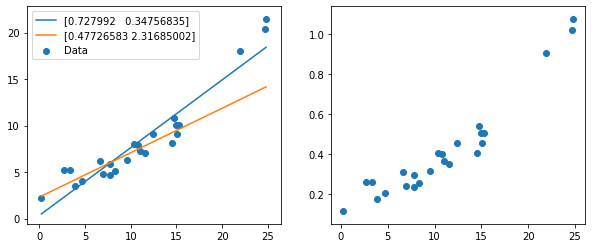

In [87]:
def y(x,m,c):
    return m*x + c
fig, ax = plt.subplots(1,2,figsize=(10,4))
df = pd.read_csv('MSE101-Tutorial-Q3.txt',skiprows=1,header=None, delimiter='\t', usecols=[i for i in [0,1,2]])
best_vals, covar = curve_fit(y,df[0][:],df[1][:], p0=[1,2], maxfev=5000)
ax[0].plot(df[0],y(df[0], 
best_vals[0], best_vals[1]),label=best_vals )

best_vals, covar = curve_fit(y,df[0][:-3],df[1][:-3], p0=[1,2], maxfev=5000)
print(best_vals)

residuals = df[1] - y(df[0], best_vals[0], best_vals[1])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((df[1]-np.mean(df[1]))**2)
r_squared = 1 - (ss_res/ss_tot)
print(r_squared)

ax[0].scatter(df[0],df[1], label='Data')
ax[0].plot(df[0],y(df[0],best_vals[0], best_vals[1]),label=best_vals )
ax[0].legend()

ax[1].scatter(df[0],df[2])

# Q11

labels
0     948.750000
1    2691.333333
2      44.000000
3    1805.250000
4    1501.000000
5      91.000000
6    1848.500000
7     122.666667
Name: x, dtype: float64

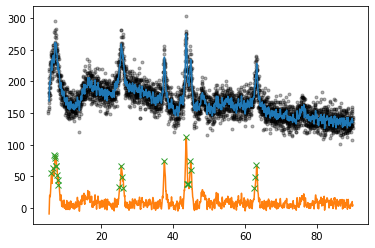

In [93]:
df = pd.read_csv('MSE101-Tutorial-Q11.txt', skiprows=1, header=None, delimiter='\t')
plt.plot(df[0], df[1],'k.',alpha=0.3)

#point averaging 
av = 10
df['av'] = 2*df[1].rolling(av, win_type='triang').sum()/av
plt.plot(df[0],df['av'], label='Rolling average')
df = df.dropna()

#base line subtraction
baseObj=BaselineRemoval(df['av'])
Zhangfit_output=baseObj.ZhangFit()
plt.plot(df[0],Zhangfit_output, label='Zhang')

#find peaks 
peaks, _ = find_peaks(Zhangfit_output, height=30)
df_p = pd.DataFrame(data=peaks)

#Cluster peaks K=3
K = 8
data_test= np.stack((np.array(df[0][peaks]), np.zeros(len(df[0][peaks]))), axis=1)
kmeans = KMeans(n_clusters=K)
kmodel = kmeans.fit(data_test)
df_p['labels'] = kmodel.labels_
plt.plot(df[0][peaks], Zhangfit_output[peaks], "x")

df_p['x'] = df_p[0]
df_p.groupby('labels')['x'].mean()


